Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2020/2021  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.4  
Zadnji put ažurirano: 22. 10. 2020.*

(c) 2015-2020 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **2. studenog 2020. u 06:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno** ili u **tandemu**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [3]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [4]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy score: 1.0


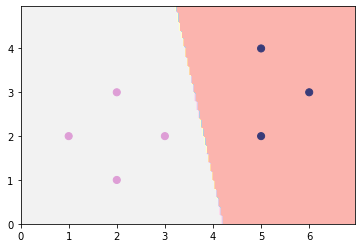

In [5]:
clf1a = RidgeClassifier(alpha=0)
clf1a.fit(seven_X, seven_y)
print("Accuracy score: {}".format(accuracy_score(seven_y, clf1a.predict(seven_X))))
plot_2d_clf_problem(seven_X, seven_y, h=clf1a.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

Accuracy score: 1.0


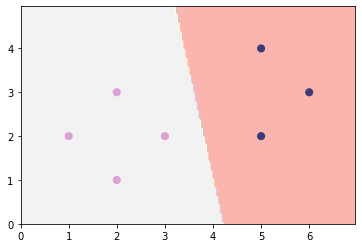

In [6]:
clf1a_reg = LinearRegression()
clf1a_reg.fit(seven_X, seven_y)
print("Accuracy score: {}".format(accuracy_score(seven_y, clf1a_reg.predict(seven_X) > 0.5)))
plot_2d_clf_problem(seven_X, seven_y, h=lambda x : clf1a_reg.predict(x) >= 0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [7]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy score: 0.875


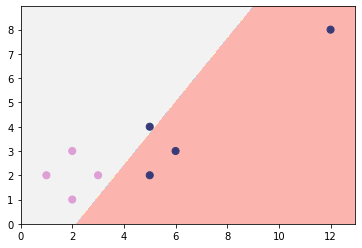

In [8]:
clf1b = LinearRegression()
clf1b.fit(outlier_X, outlier_y)
print("Accuracy score: {}".format(accuracy_score(outlier_y, clf1b.predict(outlier_X) > .5)))
plot_2d_clf_problem(outlier_X, outlier_y, h=lambda x: clf1b.predict(x) > .5)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [9]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy score: 0.875


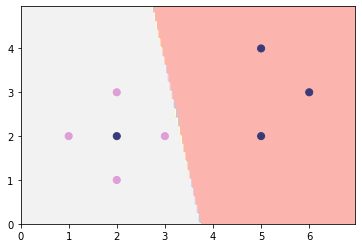

In [10]:
clf1c = LinearRegression()
clf1c.fit(unsep_X, unsep_y)
print("Accuracy score: {}".format(accuracy_score(unsep_y, clf1c.predict(unsep_X) > .5)))
plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x: clf1c.predict(x) >= 0.5)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

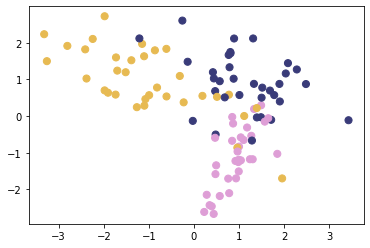

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=3)
plot_2d_clf_problem(X, y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

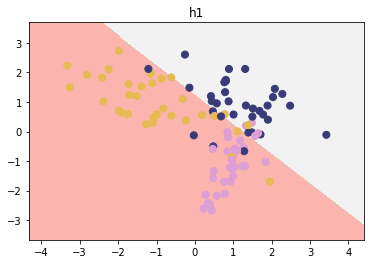

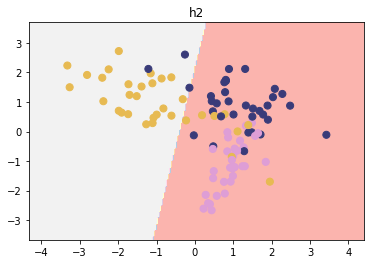

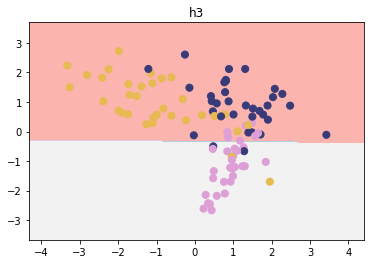

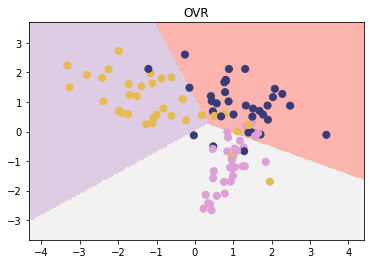

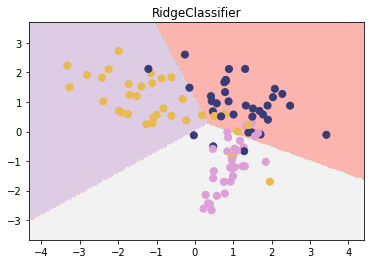

In [12]:
# y == 0
h1_y = (y == 0).astype(int)
h1 = LinearRegression()
h1.fit(X, h1_y)
plt.title('h1')
plot_2d_clf_problem(X, y, h=lambda x: h1.predict(x) >= .5)
plt.show()

# y == 1
h2_y = (y == 1).astype(int)
h2 = LinearRegression()
h2.fit(X, h2_y)
plt.title('h2')
plot_2d_clf_problem(X, y, h=lambda x: h2.predict(x) >= .5)
plt.show()

# y == 1
h3_y = (y == 2).astype(int)
h3 = LinearRegression()
h3.fit(X, h3_y)
plt.title('h3')
plot_2d_clf_problem(X, y, h=lambda x: h3.predict(x) >= .5)
plt.show()

def ovr_predict(hs, X):
    predictions = np.array(list(map(lambda h: h.predict(X), hs)))
    return np.argmax(predictions, axis=0)

plt.title('OVR')
plot_2d_clf_problem(X, y, h=lambda x: ovr_predict([h1, h2, h3], x))
plt.show()

clf2 = RidgeClassifier(alpha=0)
clf2.fit(X, y)
plt.title('RidgeClassifier')
plot_2d_clf_problem(X, y, h=clf2.predict)
plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

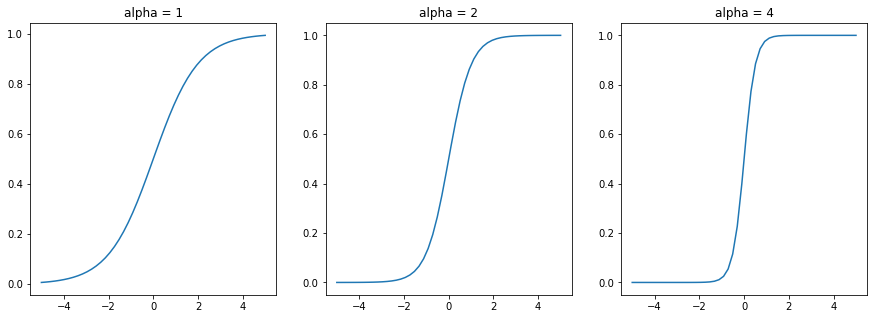

In [13]:
def sigmoid(x, alpha=1):
    return 1 / (1 + np.exp(-alpha * x))

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
x = np.linspace(-5, 5)

for i, alpha in enumerate([1, 2, 4]):
    axes[i].set_title('alpha = {}'.format(alpha))
    axes[i].plot(x, sigmoid(x, alpha))
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [14]:
from numpy import linalg

def lr_h(x, w):
    return sigmoid(np.dot(x, w[1:]) + w[0])

def cross_entropy_error(X, y, w, alpha=0):
    return ((1 / X.shape[0]) * np.sum(-y * np.log(lr_h(X, w)) - (1 - y) * np.log(1 - lr_h(X, w))) + (alpha / 2) * w[:1].T * w[:1])[0]

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False, verbose=True):
    
    y = (y == 1).astype(int)
    weights_trace = []
    last_err = 0
    
    w = np.zeros((X.shape[1] + 1))
    
    for i in range(max_iter):
        if trace:
            weights_trace.append(np.copy(w))
            
        err = cross_entropy_error(X, y, w, alpha)

        if i % 100 == 0 and verbose:
            print('Iteration: {}, Error = {}'.format(i, err))
        
        if abs(err - last_err) < epsilon:
            print('Stopped at iteration number {}.'.format(i))
            break
            
        last_err = err
        
        w0grad = 0
        wgrad = np.zeros((X.shape[1]))
            
        for j, sample in enumerate(X):
            h = lr_h(sample, w)
            w0grad += h - y[j]
            wgrad += (h - y[j]) * sample
        
        w[0] -= eta * w0grad
        w[1:] = w[1:] * (1 - alpha * eta) - eta * wgrad
        
    if trace:
        return np.array(weights_trace)
    else:
        return w

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Iteration: 0, Error = 0.6931471805599453
Iteration: 100, Error = 0.3943605338087143
Iteration: 200, Error = 0.31366843729131244
Iteration: 300, Error = 0.2651492980328971
Iteration: 400, Error = 0.23032947181777386
Iteration: 500, Error = 0.20374714203530775
Iteration: 600, Error = 0.18276147836755113
Iteration: 700, Error = 0.16579356193119574
Iteration: 800, Error = 0.15180781551143513
Iteration: 900, Error = 0.1400913686475736
Stopped at iteration number 947.


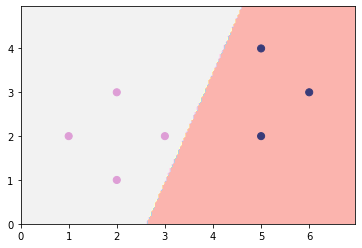

In [15]:
w = lr_train(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=lambda x: lr_h(x, w) >= 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [16]:
from sklearn.metrics import zero_one_loss

In [17]:
ws = lr_train(seven_X, seven_y, trace=True)

Iteration: 0, Error = 0.6931471805599453
Iteration: 100, Error = 0.3943605338087143
Iteration: 200, Error = 0.31366843729131244
Iteration: 300, Error = 0.2651492980328971
Iteration: 400, Error = 0.23032947181777386
Iteration: 500, Error = 0.20374714203530775
Iteration: 600, Error = 0.18276147836755113
Iteration: 700, Error = 0.16579356193119574
Iteration: 800, Error = 0.15180781551143513
Iteration: 900, Error = 0.1400913686475736
Stopped at iteration number 947.


Stopped at iteration number 1142.
Stopped at iteration number 947.
Stopped at iteration number 511.
Stopped at iteration number 378.


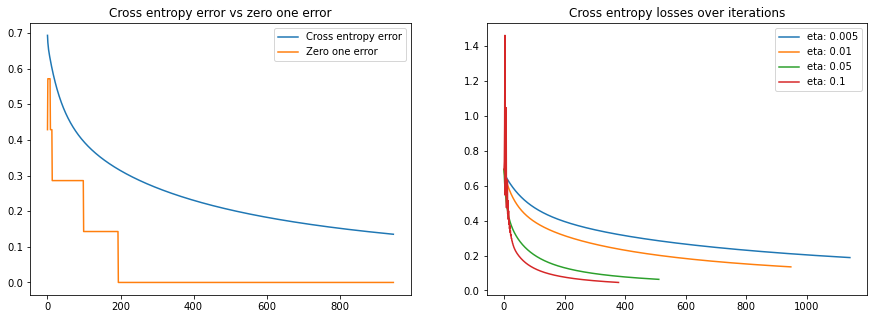

In [18]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].set_title('Cross entropy error vs zero one error')
axes[0].plot(range(len(ws)), [cross_entropy_error(seven_X, seven_y, w) for w in ws], label='Cross entropy error')
axes[0].plot(range(len(ws)), [zero_one_loss(seven_y, lr_h(seven_X, w) >= 0.5) for w in ws], label='Zero one error')
axes[0].legend()


axes[1].set_title('Cross entropy losses over iterations')
for eta in [0.005, 0.01, 0.05, 0.1]:
    eta_ws = lr_train(seven_X, seven_y, trace=True, eta=eta, verbose=False)
        
    axes[1].plot(range(len(eta_ws)), [cross_entropy_error(seven_X, seven_y, w) for w in eta_ws], label='eta: {}'.format(eta))
    
axes[1].legend()
    
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

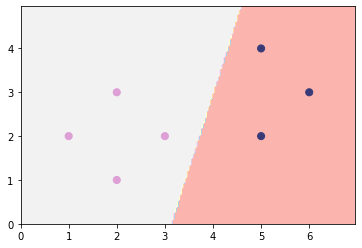

In [19]:
from sklearn.linear_model import LogisticRegression

clf3_e = LogisticRegression(max_iter=2000, penalty='none', tol=0.0001)
clf3_e.fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, h=clf3_e.predict)

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

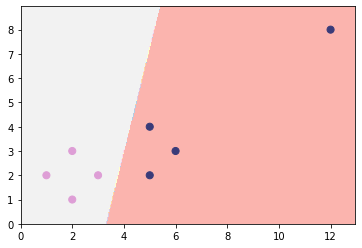

In [20]:
clf4_a = LogisticRegression(max_iter=2000, penalty='none', tol=0.0001)
clf4_a.fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, h=clf4_a.predict)

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

Iteration: 0, Error = 0.6931471805599453
Iteration: 100, Error = 0.3943605338087143
Iteration: 200, Error = 0.31366843729131244
Iteration: 300, Error = 0.2651492980328971
Iteration: 400, Error = 0.23032947181777386
Iteration: 500, Error = 0.20374714203530775
Iteration: 600, Error = 0.18276147836755113
Iteration: 700, Error = 0.16579356193119574
Iteration: 800, Error = 0.15180781551143513
Iteration: 900, Error = 0.1400913686475736
Stopped at iteration number 947.


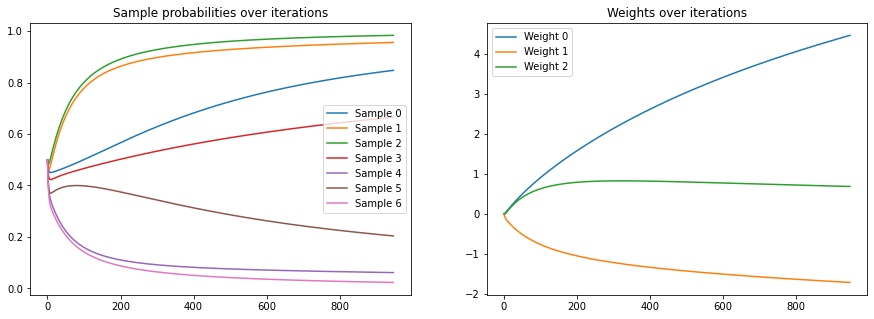

In [21]:
ws = lr_train(seven_X, seven_y, trace=True)
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].set_title('Sample probabilities over iterations')
for i in range(len(seven_X)):
    preds = []
    for w in ws:
        preds.append(lr_h(seven_X[i], w))
    axes[0].plot(range(len(ws)), preds, label='Sample {}'.format(i))
axes[0].legend()

axes[1].set_title('Weights over iterations')
axes[1].plot(range(len(ws)), [w[0] for w in ws], label='Weight 0')
axes[1].plot(range(len(ws)), [w[1] for w in ws], label='Weight 1')
axes[1].plot(range(len(ws)), [w[2] for w in ws], label='Weight 2')

axes[1].legend()

plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

Iteration: 0, Error = 0.6931471805599453
Iteration: 100, Error = 0.4859957598547817
Iteration: 200, Error = 0.4469899722986421
Iteration: 300, Error = 0.4262078053675697
Iteration: 400, Error = 0.41220369309414084
Iteration: 500, Error = 0.4020729507500463
Iteration: 600, Error = 0.39451644323431234
Iteration: 700, Error = 0.3887715811501875
Iteration: 800, Error = 0.38433883099682964
Iteration: 900, Error = 0.3808750546036543
Iteration: 1000, Error = 0.3781382408862388
Iteration: 1100, Error = 0.3759544232027084
Iteration: 1200, Error = 0.3741965270516079
Iteration: 1300, Error = 0.37277038494934867
Iteration: 1400, Error = 0.37160528901369705
Iteration: 1500, Error = 0.37064749908085026
Iteration: 1600, Error = 0.3698557133756281
Iteration: 1700, Error = 0.3691978633209924
Iteration: 1800, Error = 0.36864881483956186
Iteration: 1900, Error = 0.36818869882609523


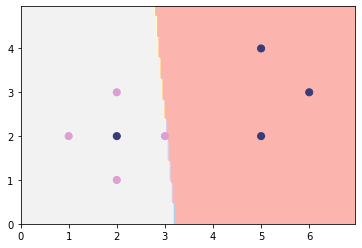

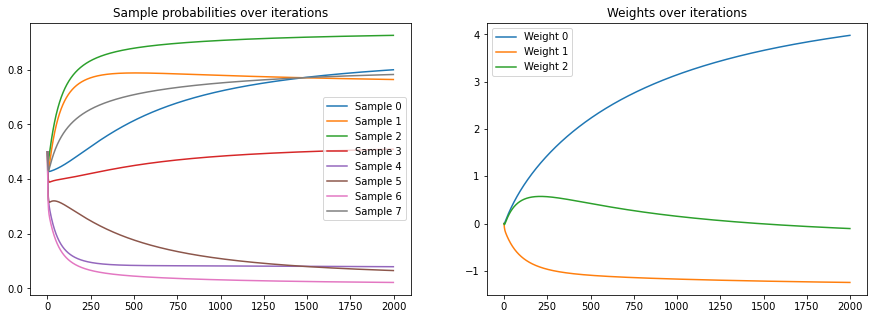

In [22]:
ws = lr_train(unsep_X, unsep_y, epsilon=1e-6, trace=True)

plot_2d_clf_problem(unsep_X, unsep_y, h=lambda x: lr_h(x, ws[-1]) >= 0.5)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].set_title('Sample probabilities over iterations')
for i in range(len(unsep_X)):
    preds = []
    for w in ws:
        preds.append(lr_h(unsep_X[i], w))
    axes[0].plot(range(len(ws)), preds, label='Sample {}'.format(i))
axes[0].legend()

axes[1].set_title('Weights over iterations')
axes[1].plot(range(len(ws)), [w[0] for w in ws], label='Weight 0')
axes[1].plot(range(len(ws)), [w[1] for w in ws], label='Weight 1')
axes[1].plot(range(len(ws)), [w[2] for w in ws], label='Weight 2')

axes[1].legend()

plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [23]:
from numpy.linalg import norm

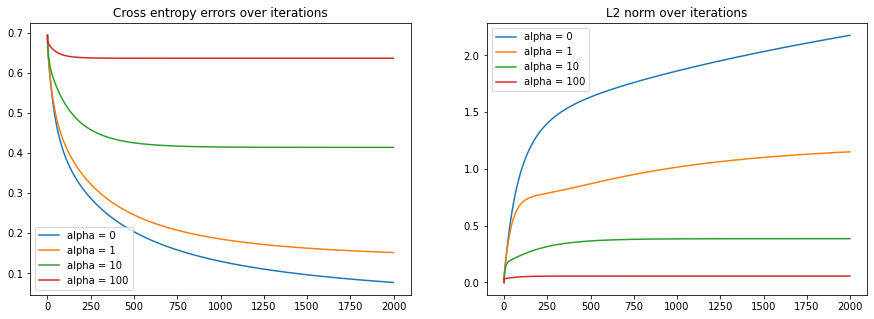

In [24]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

axes[0].set_title('Cross entropy errors over iterations')
axes[1].set_title('L2 norm over iterations')

for alpha in [0, 1, 10, 100]:
    ws = lr_train(seven_X, seven_y, alpha=alpha, trace=True, verbose=False, epsilon=0)
    axes[0].plot(range(len(ws)), [cross_entropy_error(seven_X, seven_y, w) for w in ws], label='alpha = {}'.format(alpha))
    axes[1].plot(range(len(ws)), [norm(w[1:]) for w in ws], label='alpha = {}'.format(alpha))
    
axes[0].legend()
axes[1].legend()
plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [36]:
from sklearn.preprocessing import PolynomialFeatures

#plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=2, n_classes=2)

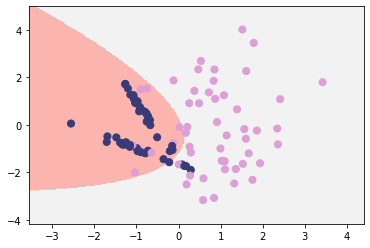

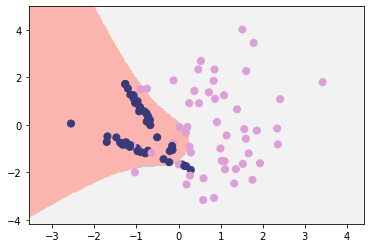

In [43]:
poly1 = PolynomialFeatures(2)
poly2 = PolynomialFeatures(3)

C = .5

clf1 = LogisticRegression(C=C)
clf2 = LogisticRegression(C=C)

clf1.fit(poly1.fit_transform(X), y)
clf2.fit(poly2.fit_transform(X), y)

plot_2d_clf_problem(X, y, lambda x : clf1.predict(poly1.transform(x)))
plt.show()

plot_2d_clf_problem(X, y, lambda x : clf2.predict(poly2.transform(x)))
plt.show()                    

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?